# Mexican Stocks Data Analysis

## Description

In this project I will analyse the stock value from two of the most important mexican food companies: Industrias [Bachoco, S.A.B. de C.V.](http://www.bachoco.com.mx/) (_BACHOCOB.MX_) and [Grupo Bimbo, S.A.B. de C.V](http://www.grupobimbo.com) (_BIMBOA.MX_). Both companies area headquarted in Mexico and play as ETF (_exchange-traded funds_) in the mexican stock market. Note that the prices are given in U.S. Dollars.

For this analysis I will use the following software: 

* __Python 2.7 (Anaconda version)__ as main programming language.
* __The Python's libraries Pandas and Numpy__ for data analysis
* __The Python's libraries Seabonrn and Matplotlib__ for data visualization.
* __Ubuntu 16.04__ as operating system.

In [1]:
# Last update
from datetime import datetime
print "Last Update: " + str(datetime.now())

Last Update: 2016-05-25 06:36:34.078832


In [13]:
# Initial imports
## For data analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# For showing plots inline
% matplotlib inline

# For reading stocks from Yahoo! Finance
from pandas.io.data import DataReader

# For division
from __future__ import division

## Data Gathering and Analysis Set-Up

In the following section I will gather the stocks' data from Yahoo! Finance and I will set a frame of one year after today to conduct the analysis, therefore, the results would change in the future depending on which day the analysis code is executed.

In [3]:
# Analysis dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# List of stock symbols to analyse
stock_sym = ['BACHOCOB.MX', 'BIMBOA.MX']

# Data gathering from Yahoo! Finance
symbols = {symbol:DataReader(symbol, 'yahoo', start, end) for symbol in stock_sym}

In [4]:
# Stocks sample data information
symbols['BACHOCOB.MX'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-25,69.89,70.60,69.88,70.55,117200,69.15810
2015-05-26,70.50,71.40,70.00,70.79,458800,69.39336
2015-05-27,70.90,72.42,70.77,71.98,604300,70.55988
2015-05-28,71.90,72.20,71.36,71.58,207500,70.16777
2015-05-29,71.00,73.73,70.91,73.61,1287500,72.15772


In [5]:
symbols["BIMBOA.MX"].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-25,41.56,41.75,41.56,41.62,216800,41.4227
2015-05-26,41.61,41.63,40.02,40.90,2645100,40.7061
2015-05-27,40.60,41.20,40.60,40.88,1540800,40.6862
2015-05-28,41.00,41.34,40.80,40.98,772500,40.7857
2015-05-29,40.70,41.98,40.66,41.68,5688300,41.4824


## Basic Data Analysis

I will start the analysis by plotting some line charts that will display the _adjusted close value_ and the _volume_ of each stock symbol.

In [61]:
# Function to create the analysis line plot
def stock_line_plot(symbol, indicator, data, ylabel):
    """Creates a line plot for basic stock symbol's indicator"""
    data[indicator].plot(legend = True, figsize = (12, 6))
    plt.title("%s Value for %s Along the Last Year" % (indicator, symbol), weight = 'bold')
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    ## Ploting the Max, Min, and Average value
    symbol_max_adj = data[indicator].max()
    symbol_min_adj = data[indicator].min()
    symbol_avg_adj = data[indicator].mean()
    plt.figtext(0.13, 0.85, "Max %0.2f" % symbol_max_adj)
    plt.axhline(y = symbol_max_adj, linewidth = 2, color = 'green')
    plt.figtext(0.13, 0.20, "Min %0.2f" % symbol_min_adj)
    plt.axhline(y = symbol_min_adj, linewidth = 2, color = 'red')
    plt.figtext(0.13, 0.50, "Avg %0.2f" % symbol_avg_adj)
    plt.axhline(y = symbol_avg_adj, linewidth = 2, color = 'orange')

### Data Analysis for _BACHOCOB.MX_

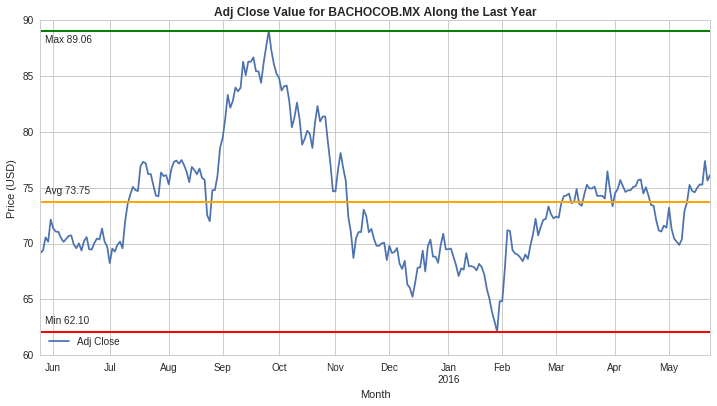

In [62]:
# Adjusted close value analysis
stock_line_plot('BACHOCOB.MX', 'Adj Close', symbols['BACHOCOB.MX'], 'Price (USD)')

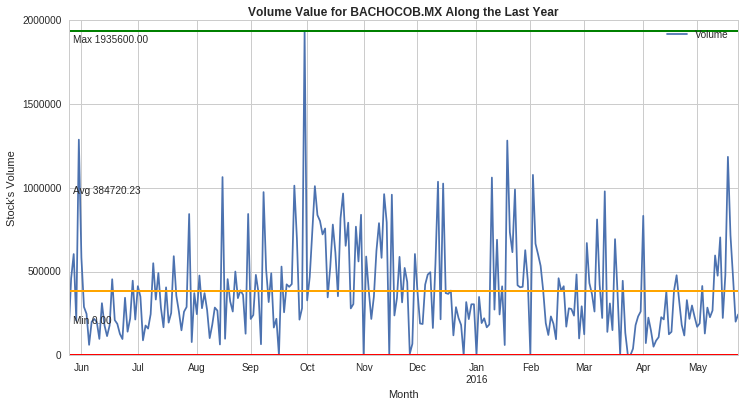

In [63]:
# Volume analysis
stock_line_plot('BACHOCOB.MX', 'Volume', symbols['BACHOCOB.MX'], "Stock's Volume")

### Data Analysis for _BIMBOA.MX_

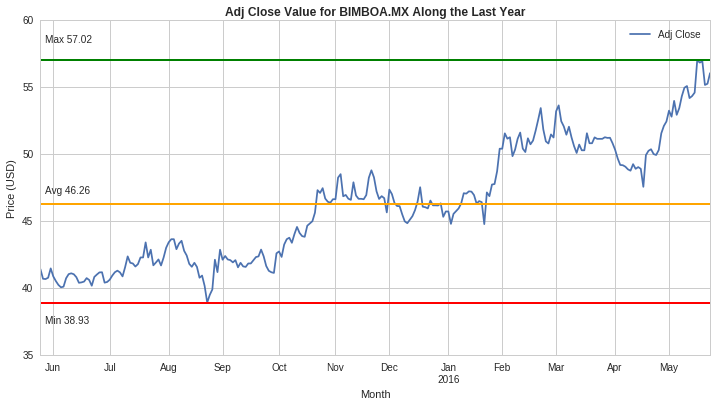

In [64]:
# Adjusted close value analysis
stock_line_plot('BIMBOA.MX', 'Adj Close', symbols['BIMBOA.MX'], 'Price (USD)')

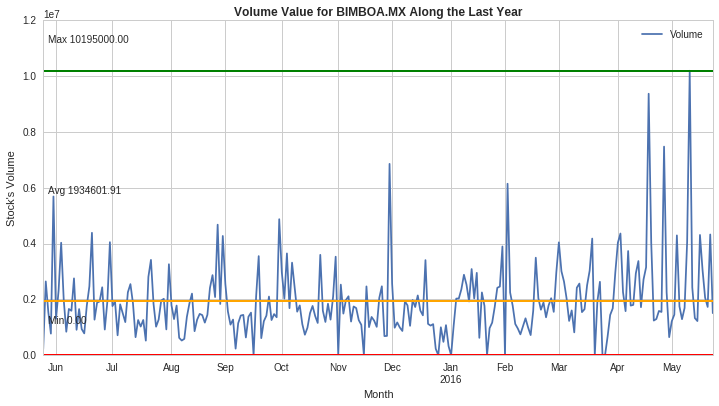

In [65]:
# Volume analysis
stock_line_plot('BIMBOA.MX', 'Volume', symbols['BIMBOA.MX'], "Stock's Volume")

### Comparing the Two Companies Adj Close

In [69]:
# Create a new data frame for closing stocks values only
closing_df = DataReader(stock_sym, 'yahoo', start, end)['Adj Close']

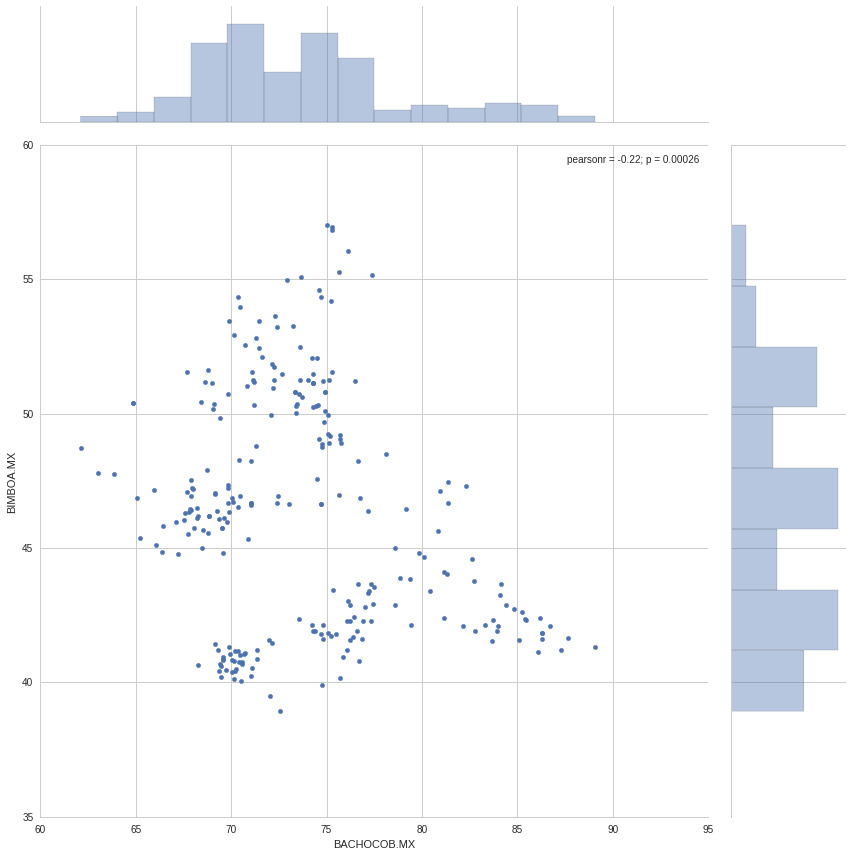

In [70]:
sns.jointplot(x = 'BACHOCOB.MX', y = 'BIMBOA.MX', data = closing_df, size = 12)

## Analysing Moving Averages (MA)



Now I wil caculate the moving average for the stock. For more info on the _moving average_ check out the following links:

1. http://www.investopedia.com/terms/m/movingaverage.asp
2. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


In [71]:
# Define the moving averages to work with
ma_day = [10, 20, 50]

# Now we will add a new column to each dataframe with the MA information